In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('BIKE DETAILS.csv')

In [7]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


# 1 What is the range of selling prices in the dataset

In [17]:
ranges = df['selling_price'].max() - df['selling_price'].min()

In [19]:
ranges

755000

# 2 What is the median selling price for bikes in the datasetD

In [22]:
selling_prc_median = df['selling_price'].median()

In [24]:
selling_prc_median

45000.0

# 3 What is the most common seller type

In [27]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [29]:
df['seller_type'].mode()

0    Individual
Name: seller_type, dtype: object

In [31]:
# most common seller type 'individual'

# 4 How many bikes have driven more than 50,000 kilometers

In [40]:
df[df['km_driven'] > 50000].shape[0]

170

In [42]:
# 170 bikes driven more than 50,000 km

# 5 What is the average km_driven value for each ownership type

In [45]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [49]:
df.groupby('owner')['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

# 6 What proportion of bikes are from the year 2015 or olderD

In [66]:
older_bikes = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]

proportion = older_bikes/total_bikes
proportion


0.5664467483506126

# What is the trend of missing values across the dataset

In [74]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [76]:
# answer >>
"""
The dataset is largely complete, with no missing values in most columns. However, the 
ex_showroom_price column contains a significant number of missing values (435), 
indicating that missing data is concentrated in this single feature rather than spread 
across the dataset.

"""

'\nThe dataset is largely complete, with no missing values in most columns. However, the \nex_showroom_price column contains a significant number of missing values (435), \nindicating that missing data is concentrated in this single feature rather than spread \nacross the dataset.\n\n'

# 8.What is the highest ex_showroom_price recorded, and for which bike

In [101]:
df.groupby('name')['ex_showroom_price'].max().sort_values(ascending=False)


name
Harley-Davidson Street Bob        1278000.0
Suzuki GSX S750                    752020.0
Kawasaki Ninja 650 [2018-2019]     599000.0
Harley-Davidson Street 750         534000.0
Kawasaki Ninja 300                 360000.0
                                    ...    
Yamaha Gladiator                        NaN
Yamaha RX135                            NaN
Yamaha RXG                              NaN
Yamaha Rx                               NaN
Yamaha SZ [2013-2014]                   NaN
Name: ex_showroom_price, Length: 279, dtype: float64

In [103]:
# Harley-Davidson Street Bob        1278000.0 

# 9 What is the total number of bikes listed by each seller type

In [106]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [122]:
df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [124]:
# bike listed 1055 to individual and 6 to dealer

# 10 What is the relationship between selling_price and km_driven for first-owner bikes

In [131]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

<Axes: xlabel='km_driven', ylabel='selling_price'>

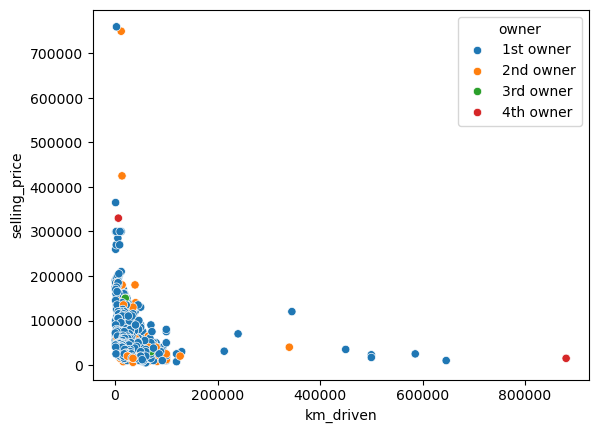

In [147]:
import seaborn as sns

sns.scatterplot(
    x='km_driven',
    y='selling_price',
    hue='owner',
    data=df
)


In [149]:
'''

“The scatter plot indicates a negative relationship between selling price and kilometers
driven across all ownership categories. First-owner bikes generally command higher prices,
while bikes with multiple previous owners tend to have lower selling prices, especially 
at higher mileage.”

'''

'\n\n“The scatter plot indicates a negative relationship between selling price and kilometers\ndriven across all ownership categories. First-owner bikes generally command higher prices,\nwhile bikes with multiple previous owners tend to have lower selling prices, especially \nat higher mileage.”\n\n'

# 11 Identify and remove outliers in the km_driven column using the IQR method

In [152]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [156]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


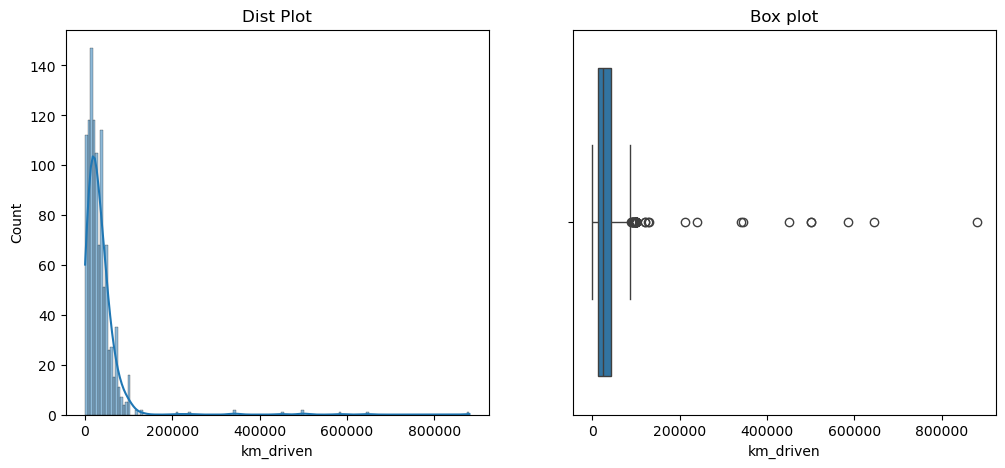

In [162]:
#To check outliers>> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['km_driven'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x = 'km_driven')
plt.title("Box plot")
plt.show()

In [164]:
Q1 = df["km_driven"].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3-Q1
lf = Q1-1.5*IQR
uf = Q3+1.5*IQR

In [176]:
df_filtered = df[(df.km_driven >= lf) & (df.km_driven <= uf)]

In [180]:
#capping
new_df_cap = df.copy()

new_df_cap['km_driven'] = np.where(
    new_df_cap['km_driven'] > uf, uf,
    np.where(
        new_df_cap['km_driven'] < lf, lf,
        new_df_cap['km_driven']
    )
)
    

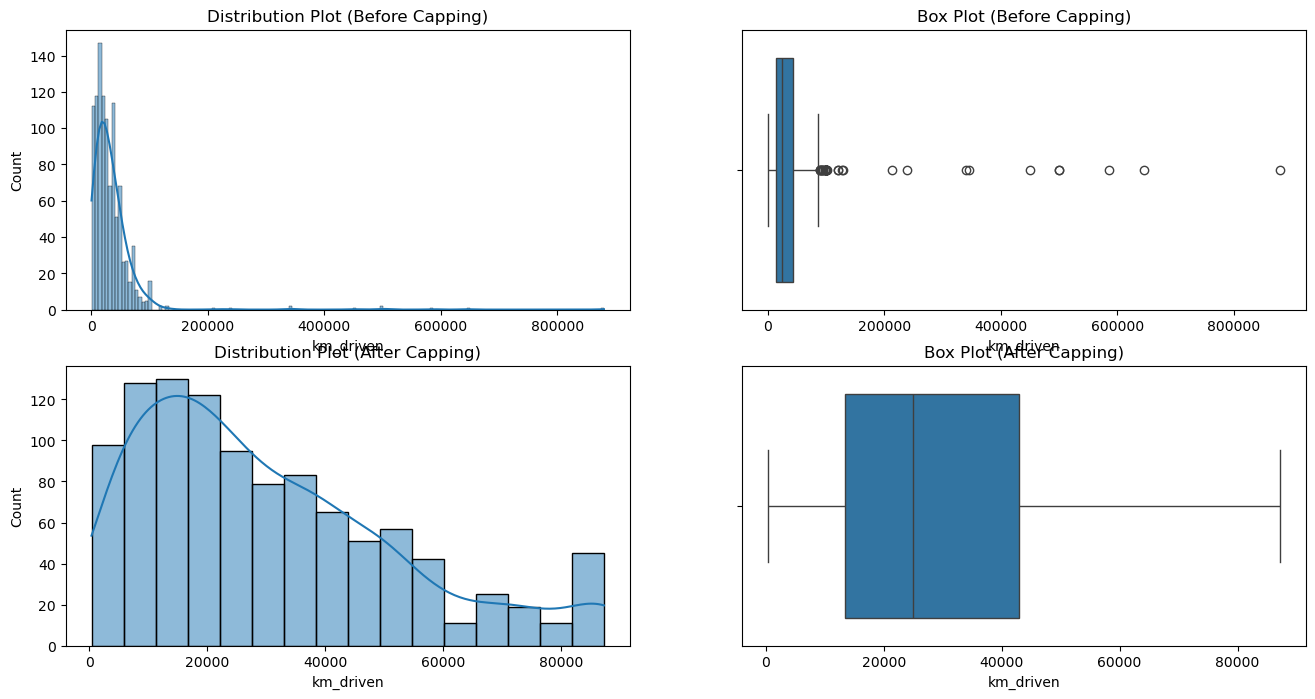

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['km_driven'], kde=True)
plt.title('Distribution Plot (Before Capping)')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['km_driven'])
plt.title('Box Plot (Before Capping)')

plt.subplot(2, 2, 3)
sns.histplot(new_df_cap['km_driven'], kde=True)
plt.title('Distribution Plot (After Capping)')

plt.subplot(2, 2, 4)
sns.boxplot(x=new_df_cap['km_driven'])
plt.title('Box Plot (After Capping)')

plt.show()


# 12 Perform a bivariate analysis to visualize the relationship between year and selling_priceB

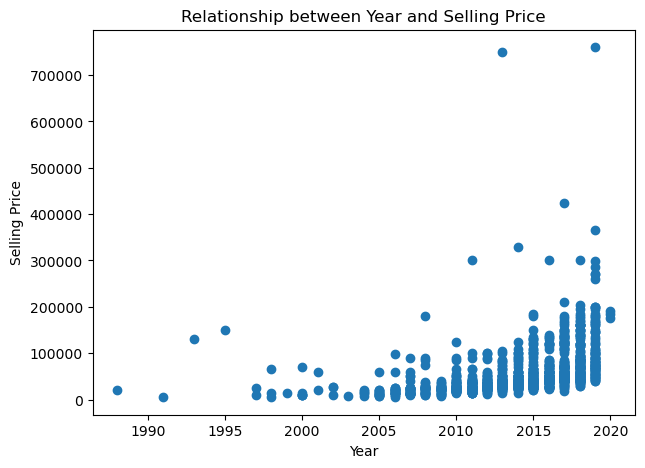

In [191]:


plt.figure(figsize=(7,5))
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Relationship between Year and Selling Price')
plt.show()


In [189]:
# “The scatter plot shows a positive relationship between year and selling price, indicating that newer bikes generally have higher selling prices.”

# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year

In [194]:
current_year = 2025

df['bike_age'] = current_year - df['year']


In [196]:
avg_price_by_age = df.groupby('bike_age')['selling_price'].mean()
avg_price_by_age


bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64

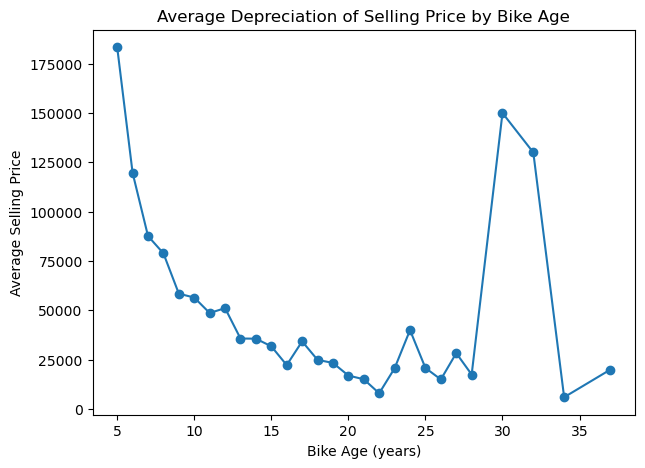

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(avg_price_by_age.index, avg_price_by_age.values, marker='o')
plt.xlabel('Bike Age (years)')
plt.ylabel('Average Selling Price')
plt.title('Average Depreciation of Selling Price by Bike Age')
plt.show()


In [200]:
avg_depreciation_per_year = avg_price_by_age.diff().mean()
avg_depreciation_per_year


-6049.382716049383

“The analysis shows that the average selling price decreases as the bike’s age increases, indicating consistent depreciation over time. Older bikes tend to have significantly lower average selling prices compared to newer models.”

# 14 Which bike names are priced significantly above the average price for their manufacturing year

In [204]:
year_avg = df.groupby('year')['selling_price'].mean()


In [206]:
df['year_avg_price'] = df['year'].map(year_avg)


In [208]:
df['above_avg'] = df['selling_price'] > 1.2 * df['year_avg_price']


In [210]:
premium_bikes = df[df['above_avg']][['name', 'year', 'selling_price', 'year_avg_price']]
premium_bikes


,name,year,selling_price,year_avg_price
0,Royal Enfield Classic 350,2019,175000,119689.511628
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
17,Yamaha YZF R15 S,2010,40000,31793.333333
...,...,...,...,...
984,Royal Enfield Classic 500,2014,95000,48668.131868
985,Royal Enfield Classic 500,2011,90000,35655.721311
1005,TVS Apache RTR 160,2014,60000,48668.131868
1008,Bajaj Pulsar 220 F,2012,52000,35748.400000


In [212]:
premium_bikes.sort_values(
    by=['year', 'selling_price'],
    ascending=[True, False]
)


,name,year,selling_price,year_avg_price
715,Yamaha RXG,1997,25000,17500.000000
554,Yamaha RX135,1998,65000,28333.333333
306,Yamaha Rx,2000,70000,20833.333333
837,Royal Enfield Bullet 350 [2007-2011],2001,60000,40000.000000
780,TVS Victor GLX,2002,27000,20666.666667
...,...,...,...,...
320,Jawa Standard,2019,160000,119689.511628
96,Yamaha FZ25,2019,150000,119689.511628
252,Royal Enfield Thunderbird 350X,2019,145000,119689.511628
405,Yamaha FZ25,2019,145000,119689.511628


“Several bike models are priced significantly above the average selling price for their manufacturing year. These bikes likely represent premium brands, better conditions, or higher-demand models compared to others from the same year.”

#  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [216]:
numeric_df = df.select_dtypes(include='number')


In [218]:
corr_matrix = numeric_df.corr()
corr_matrix


,selling_price,year,km_driven,ex_showroom_price,bike_age,year_avg_price
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.402188,0.501140
year,0.402188,1.000000,-0.288675,0.126378,-1.000000,0.802547
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.288675,-0.309402
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,-0.126378,0.146598
bike_age,-0.402188,-1.000000,0.288675,-0.126378,1.000000,-0.802547
year_avg_price,0.501140,0.802547,-0.309402,0.146598,-0.802547,1.000000


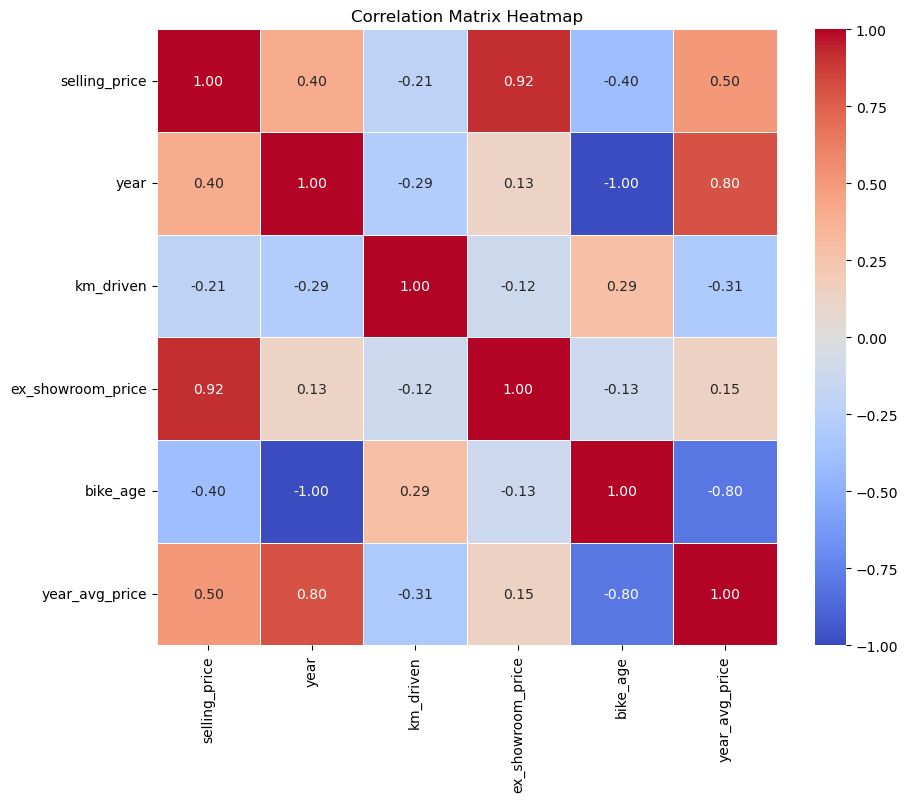

In [220]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Matrix Heatmap')
plt.show()
